In [93]:
#imports
#!pip install yfinance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import yfinance as yf
from datetime import date
from dmba import regressionSummary

In [94]:
# Define the interval of interest, year 2021 to today
end_date = date.today()
start_date = '2020-01-01'

#input valid ticker for choice
choice = input("Please enter a valid ticker: ")
print("analyzing choice:", choice)

# get the data from the "yahoo" data source
data_single_choice = yf.download(choice
                                 , start=start_date
                                 , end=end_date
                                 )
# add ticker column and name rows with the name of the ticker (choice) 
# &   remove adj close column
data_single_choice['Ticker'] = choice
data_single_choice = data_single_choice.drop(columns='Adj Close')

Please enter a valid ticker: spy
analyzing choice: spy
[*********************100%***********************]  1 of 1 completed


In [95]:
print(data_single_choice,"\n")
print(data_single_choice.describe(),"\n")
print(data_single_choice.info())

                  Open        High         Low       Close    Volume Ticker
Date                                                                       
2020-01-02  323.540009  324.890015  322.529999  324.869995  59151200    spy
2020-01-03  321.160004  323.640015  321.100006  322.410004  77709700    spy
2020-01-06  320.489990  323.730011  320.359985  323.640015  55653900    spy
2020-01-07  323.019989  323.540009  322.239990  322.730011  40496400    spy
2020-01-08  322.940002  325.779999  322.670013  324.450012  68296000    spy
...                ...         ...         ...         ...       ...    ...
2022-11-18  397.739990  397.809998  393.040009  396.029999  92783500    spy
2022-11-21  394.640015  395.820007  392.660004  394.589996  51243200    spy
2022-11-22  396.630005  400.070007  395.149994  399.899994  60429000    spy
2022-11-23  399.549988  402.929993  399.309998  402.420013  68261600    spy
2022-11-25  401.829987  402.910004  401.540009  402.329987  30545400    spy

[732 rows x

<function matplotlib.pyplot.show(close=None, block=None)>

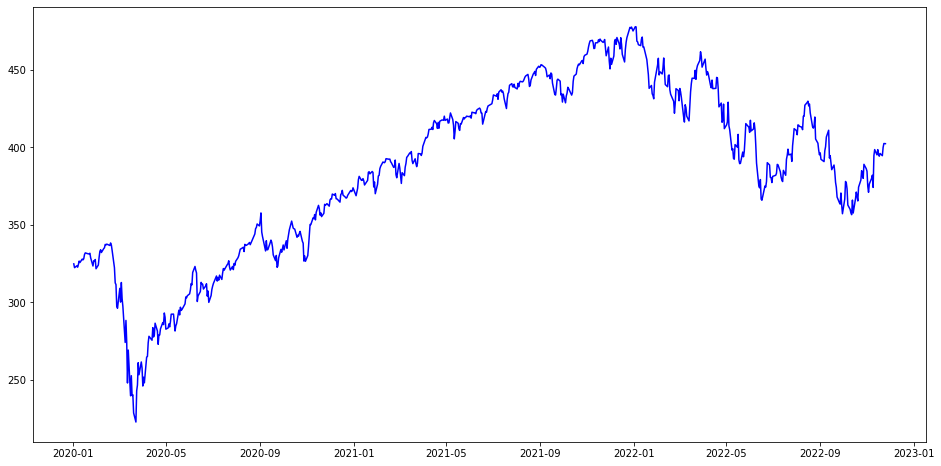

In [96]:
#increases size of chart
plt.figure(figsize=(16,8))

#year data chart
plt.plot(data_single_choice.Close,color='blue')
plt.show

In [97]:
close_df = data_single_choice[['Close']]

#get pandas error about slicing, create copy
cdf = close_df.copy()
close_df.head(5)

,Close
Date,
2020-01-02,324.869995
2020-01-03,322.410004
2020-01-06,323.640015
2020-01-07,322.730011
2020-01-08,324.450012


In [98]:
#variable to predict n days out into future
n = 30
#create a target data column, shifted n units/days 
cdf['Prediction'] = cdf[['Close']].shift(-n)
print(cdf.tail(35))

                 Close  Prediction
Date                              
2022-10-07  362.790009  396.029999
2022-10-10  360.019989  394.589996
2022-10-11  357.739990  399.899994
2022-10-12  356.559998  402.420013
2022-10-13  365.970001  402.329987
2022-10-14  357.630005         NaN
2022-10-17  366.820007         NaN
2022-10-18  371.130005         NaN
2022-10-19  368.500000         NaN
2022-10-20  365.410004         NaN
2022-10-21  374.290009         NaN
2022-10-24  378.869995         NaN
2022-10-25  384.920013         NaN
2022-10-26  382.019989         NaN
2022-10-27  379.980011         NaN
2022-10-28  389.019989         NaN
2022-10-31  386.209991         NaN
2022-11-01  384.519989         NaN
2022-11-02  374.869995         NaN
2022-11-03  371.010010         NaN
2022-11-04  376.350006         NaN
2022-11-07  379.950012         NaN
2022-11-08  382.000000         NaN
2022-11-09  374.130005         NaN
2022-11-10  394.690002         NaN
2022-11-11  398.510010         NaN
2022-11-14  395.1199

In [99]:
#feature data set x and convert it to np array and remove nan and last n rows/days
print("x filtered")
x = np.array(cdf.drop(['Prediction'], axis=1))[:-n]

print(x)

x filtered
[[324.86999512]
 [322.41000366]
 [323.64001465]
 [322.73001099]
 [324.45001221]
 [326.6499939 ]
 [325.70999146]
 [327.95001221]
 [327.45001221]
 [328.19000244]
 [330.92001343]
 [331.95001221]
 [331.29998779]
 [331.33999634]
 [331.72000122]
 [328.76998901]
 [323.5       ]
 [326.89001465]
 [326.61999512]
 [327.67999268]
 [321.73001099]
 [324.11999512]
 [329.05999756]
 [332.85998535]
 [333.98001099]
 [332.20001221]
 [334.67999268]
 [335.26000977]
 [337.42001343]
 [337.05999756]
 [337.6000061 ]
 [336.73001099]
 [338.33999634]
 [336.95001221]
 [333.48001099]
 [322.42001343]
 [312.6499939 ]
 [311.5       ]
 [297.51000977]
 [296.26000977]
 [309.08999634]
 [300.23999023]
 [312.85998535]
 [302.45999146]
 [297.45999146]
 [274.23001099]
 [288.42001343]
 [274.35998535]
 [248.11000061]
 [269.32000732]
 [239.8500061 ]
 [252.80000305]
 [240.        ]
 [240.50999451]
 [228.80000305]
 [222.94999695]
 [243.1499939 ]
 [246.78999329]
 [261.20001221]
 [253.41999817]
 [261.6499939 ]
 [257.75     

In [100]:
print("y filtered \n")
#target data set y and convert to np array and remove nan
y = np.array(cdf['Prediction'])[:-n]
print(y)


y filtered 

[337.6000061  336.73001099 338.33999634 336.95001221 333.48001099
 322.42001343 312.6499939  311.5        297.51000977 296.26000977
 309.08999634 300.23999023 312.85998535 302.45999146 297.45999146
 274.23001099 288.42001343 274.35998535 248.11000061 269.32000732
 239.8500061  252.80000305 240.         240.50999451 228.80000305
 222.94999695 243.1499939  246.78999329 261.20001221 253.41999817
 261.6499939  257.75       246.1499939  251.83000183 248.19000244
 264.85998535 265.13000488 274.02999878 278.20001221 275.66000366
 283.79000854 277.76000977 279.1000061  286.64001465 281.58999634
 273.04000854 279.1000061  279.07998657 282.97000122 287.04998779
 285.73001099 293.20999146 290.48001099 282.79000854 283.57000732
 286.19000244 284.25       287.67999268 292.44000244 292.5
 286.67001343 281.6000061  284.97000122 286.27999878 295.
 291.97000122 296.92999268 294.88000488 295.44000244 299.07998657
 303.52999878 302.97000122 304.32000732 305.54998779 308.07998657
 312.1799926

In [101]:
#split data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2)

In [102]:
#create models
#decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#linear regresssion model
lr = LinearRegression().fit(x_train,y_train)


In [103]:
#get the last n rows of feature dataset

x_future = cdf.drop(['Prediction'],axis=1)[:-n]
x_future = x_future.tail(n)
x_future = np.array(x_future)
print(x_future)


[[396.42001343]
 [392.23999023]
 [390.76000977]
 [397.77999878]
 [400.38000488]
 [406.6000061 ]
 [410.97000122]
 [393.1000061 ]
 [394.6000061 ]
 [390.11999512]
 [385.55999756]
 [388.54998779]
 [384.08999634]
 [377.39001465]
 [374.22000122]
 [367.95001221]
 [364.30999756]
 [363.38000488]
 [370.52999878]
 [362.79000854]
 [357.17999268]
 [366.60998535]
 [377.97000122]
 [377.08999634]
 [373.20001221]
 [362.79000854]
 [360.01998901]
 [357.73999023]
 [356.55999756]
 [365.97000122]]


In [104]:
#actual values to compare against predicted values
yy = cdf['Prediction'][:-n]
yy = yy.tail(n)
yy = np.array(yy)

#show model tree prediction
tree_prediction = tree.predict(x_future)
print("decision tree regressor 30 day prediction\n")
print(tree_prediction)
regressionSummary(yy, tree_prediction)

print("")

#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print("linear regression 30 day prediction\n")
print(lr_prediction)
regressionSummary(yy, lr_prediction)


decision tree regressor 30 day prediction

[417.51998901 366.82000732 371.13000488 368.5        365.41000366
 374.29000854 378.86999512 384.92001343 382.01998901 379.98001099
 405.30999756 386.20999146 384.51998901 374.86999512 371.01000977
 376.3500061  379.95001221 382.         374.13000488 395.36000061
 398.51000977 395.11999512 398.48999023 395.45001221 394.23999023
 395.36000061 394.58999634 399.8999939  402.42001343 402.32998657]

Regression statistics

                      Mean Error (ME) : -2.5393
       Root Mean Squared Error (RMSE) : 11.3329
            Mean Absolute Error (MAE) : 2.5840
          Mean Percentage Error (MPE) : -0.6978
Mean Absolute Percentage Error (MAPE) : 0.7091

linear regression 30 day prediction

[397.26265358 393.65643317 392.37961352 398.43595016 400.67904658
 406.04521187 409.81532625 394.3983924  395.69248345 391.82745536
 387.89342067 390.47296708 386.62521039 380.84495282 378.11009548
 372.70080436 369.5604641  368.75813397 374.92662939 368.24912

In [105]:
lr_df=pd.DataFrame({'Actual':yy, 'Predicted':lr_prediction})
print("linear regression \n",lr_df.head(305))

print("")

tree_df=pd.DataFrame({'Actual':yy, 'Predicted':tree_prediction})
print("decision tree regression \n",tree_df.head(30))


linear regression 
         Actual   Predicted
0   357.630005  397.262654
1   366.820007  393.656433
2   371.130005  392.379614
3   368.500000  398.435950
4   365.410004  400.679047
5   374.290009  406.045212
6   378.869995  409.815326
7   384.920013  394.398392
8   382.019989  395.692483
9   379.980011  391.827455
10  389.019989  387.893421
11  386.209991  390.472967
12  384.519989  386.625210
13  374.869995  380.844953
14  371.010010  378.110095
15  376.350006  372.700804
16  379.950012  369.560464
17  382.000000  368.758134
18  374.130005  374.926629
19  394.690002  368.249128
20  398.510010  363.409214
21  395.119995  371.544727
22  398.489990  381.345323
23  395.450012  380.586119
24  394.239990  377.230123
25  396.029999  368.249128
26  394.589996  365.859356
27  399.899994  363.892339
28  402.420013  362.874327
29  402.329987  370.992595

decision tree regression 
         Actual   Predicted
0   357.630005  417.519989
1   366.820007  366.820007
2   371.130005  371.130005
3   368

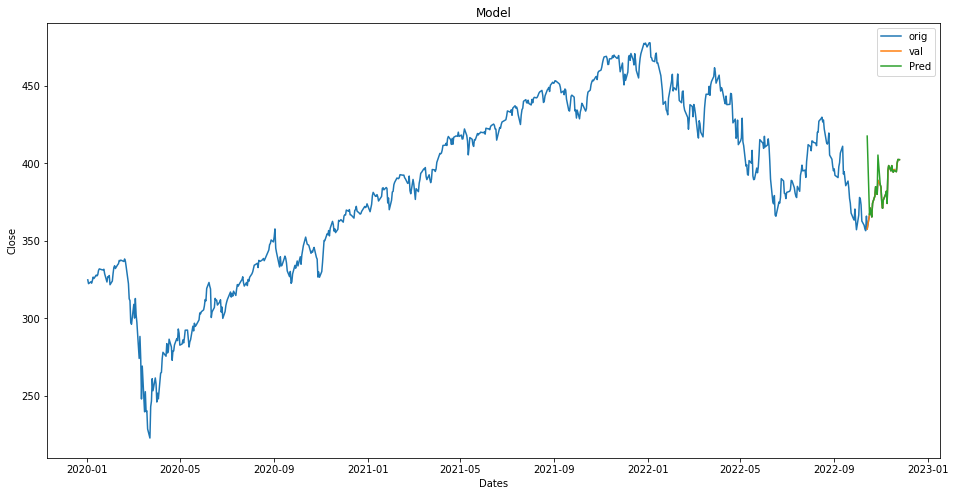

In [106]:
#visualize tree prediciotn
predictions = tree_prediction

valid = cdf[x.shape[0]:].copy()
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Close')
plt.plot(cdf['Close'])

plt.plot(valid[['Close','Predictions']])
plt.legend(['orig','val','Pred'])
plt.show()

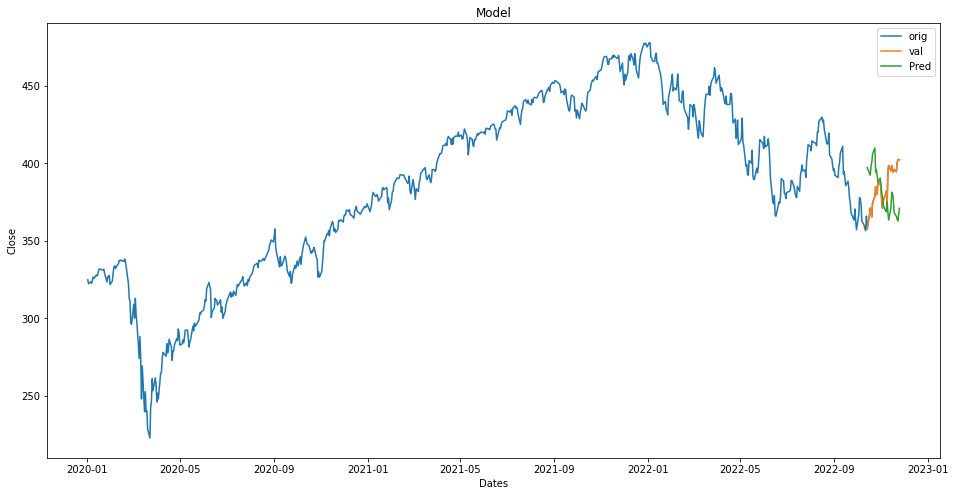

In [107]:
#visualize linear regression
predictions = lr_prediction

valid = cdf[x.shape[0]:].copy()
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Close')
plt.plot(cdf['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['orig','val','Pred'])
plt.show()